In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline                         

In [4]:
housedata_test=pd.read_csv("D:/analytics/Predictive_Analysis/HousePrice Prediction/test.csv")  # https://www.kaggle.com/c/house-prices-advanced-regression-techniques-kaggle problem

In [5]:
housedata_train=pd.read_csv("D:/analytics/Predictive_Analysis/HousePrice Prediction/train.csv")

In [6]:
housedata_test.head() ## look out for three types of dat 1) Numerial 2) Values/categories codded as Numeric(vaues) 3)categorical data 4) character data/string data 5) dates types/time series

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
housedata_train.head() # look out for three types of dat 1) Numerial 2) Values/categories codded as Numeric(vaues) 3)categorical data 4) character data/string data 5) dates types/time series

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
(housedata_train.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [9]:
housedata_trainnum=housedata_train.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
housedata_traincat=housedata_train.select_dtypes(include=[object])

In [10]:
housedata_trainnum.shape  # numeric variable colulmns

(1460, 38)

In [11]:
housedata_traincat.shape  # categorical variable columns

(1460, 43)

In [12]:
housedata_trainnum.head() #"MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold" these data values are not numeric hence deleting

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
housepricevalues=housedata_trainnum[["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]]

In [14]:
housedata_trainnum=housedata_trainnum.drop(["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"],axis=1)

In [15]:
housedata_trainnum.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,250000


In [16]:
(housedata_traincat.isnull().sum()).sort_values(ascending=False) #these categorical values should be converted into none or no Pool so on..

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [17]:
nonecols=["Alley","Fence","PoolQC","MiscFeature","FireplaceQu"] 

In [18]:
for col in nonecols:
    housedata_traincat[col]=housedata_traincat[col].fillna(value="No")   #fillna function in pandas for data cleaning

C:\Users\Phani deep\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
housedata_traincat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
3,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
4,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal


In [20]:
(housedata_traincat.isnull().sum()).sort_values(ascending=False)

GarageType       81
GarageCond       81
GarageQual       81
GarageFinish     81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
Utilities         0
LotConfig         0
LandSlope         0
Exterior1st       0
Neighborhood      0
Condition1        0
Condition2        0
LandContour       0
LotShape          0
Alley             0
Street            0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
SaleCondition     0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
SaleType          0
Heating           0
HeatingQC         0
CentralAir        0
KitchenQual       0
Functional        0
FireplaceQu       0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
MSZoning          0
dtype: int64

In [21]:
pd.value_counts(housedata_traincat.FireplaceQu) # so we need to delete fireplace too as it is not necessary to have fireplace at evry house

No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [22]:
Garagecols=["GarageType","GarageCond","GarageQual","GarageFinish"] #mod imputation

In [23]:
for cols in Garagecols:
    Garagecol=pd.value_counts(housedata_traincat[cols])
    print(Garagecol)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [24]:
Bsmtcols=["BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"] # mod imputation

In [25]:
for cols in Bsmtcols:
    Bsmtcol=pd.value_counts(housedata_traincat[cols])
    print(Bsmtcol)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [26]:
for col in housedata_traincat:
    housedata_traincat[col].fillna(housedata_traincat[col].value_counts().idxmax(),inplace=True) #idxmax will impute the name of the column(for categorical value),max will impute column value(for numerical value)

C:\Users\Phani deep\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
for cols in Bsmtcols:
    Bsmtcol=pd.value_counts(housedata_traincat[cols])
    print(Bsmtcol)         # increased in the number of unf

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [28]:
(housedata_traincat.isnull().sum()).sort_values(ascending=False)

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

In [29]:
(housedata_trainnum.isnull().sum()).sort_values(ascending=False)

LotFrontage      259
MasVnrArea         8
SalePrice          0
MiscVal            0
LotArea            0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
Id                 0
dtype: int64

In [30]:
housedata_trainnum.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0


In [31]:
for col in housedata_trainnum:
    housedata_trainnum[col].fillna(housedata_trainnum[col].mean(),inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
housedata_traincat1=housedata_traincat.apply(le.fit_transform)
housepricevalues1=housepricevalues.apply(le.fit_transform)

In [35]:
housepricedf=pd.concat([housedata_trainnum,housedata_traincat1,housepricevalues1],axis=1)

In [36]:
housepricedf.head().transpose()

,0,1,2,3,4
Id,1.0,2.0,3.0,4.0,5.0
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0


In [160]:
y=housepricedf.SalePrice
X=housepricedf.drop(["Id","SalePrice"],axis=1)

In [180]:
from sklearn.linear_model import LinearRegression   # training data

In [181]:
LinReg=LinearRegression()

In [182]:
LinReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
LinReg.score(X,y)

0.85460008688998967

In [185]:
LinReg.intercept_

260211.03754566115

In [186]:
print(list(zip(LinReg.coef_,X)))  # coefficient with value name

[(-154.58442100651493, 'LotFrontage'), (0.41078875639938595, 'LotArea'), (32.799811404154468, 'MasVnrArea'), (3.672995345647962, 'BsmtFinSF1'), (5.6050007593658222, 'BsmtFinSF2'), (-3.8543083212958322, 'BsmtUnfSF'), (5.4236872135409726, 'TotalBsmtSF'), (24.374446060772271, '1stFlrSF'), (20.138598816690916, '2ndFlrSF'), (-20.920232764177129, 'LowQualFinSF'), (23.592812074580465, 'GrLivArea'), (6893.2119340586432, 'BsmtFullBath'), (-67.136050847062762, 'BsmtHalfBath'), (3021.2030992721502, 'FullBath'), (-40.616718696933347, 'HalfBath'), (-3504.5398941827416, 'BedroomAbvGr'), (-11762.969919646794, 'KitchenAbvGr'), (3753.0638374948894, 'TotRmsAbvGrd'), (5341.5161178346079, 'Fireplaces'), (12202.91201835735, 'GarageCars'), (-6.709210756209103, 'GarageArea'), (20.50458616131526, 'WoodDeckSF'), (-5.9561426186303716, 'OpenPorchSF'), (-2.1707543609538931, 'EnclosedPorch'), (30.206237151131177, '3SsnPorch'), (45.986810831938605, 'ScreenPorch'), (-281.73314179605802, 'PoolArea'), (-0.019426245159

In [187]:
housepredict=LinReg.predict(X)

In [188]:
houseresidual=y-housepredict

In [190]:
np.sqrt(np.mean((houseresidual)**2))  # root mean square error

30282.115387023299

In [192]:
from sklearn.tree import DecisionTreeRegressor   #Decision tree

In [193]:
DecTree=DecisionTreeRegressor()

In [194]:
DecTree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [195]:
DecTree.score(X,y)

1.0

In [196]:
DecTreepredict=DecTree.predict(X)

In [197]:
DecTreeresidual=y-DecTreepredict

In [198]:
np.sqrt(np.mean((DecTreeresidual)**2))

0.0

In [199]:
DecTreepredict

array([ 208500.,  181500.,  223500., ...,  266500.,  142125.,  147500.])

In [200]:
from sklearn.ensemble import RandomForestRegressor   #Random Forest

In [201]:
Randfor=RandomForestRegressor(n_estimators=1000)

In [208]:
Randfor.fit(X,np.log(y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [209]:
Randfor.score(X,np.log(y))

0.98331895816151349

In [210]:
Randforpredict=Randfor.predict(X)

In [219]:
pd.DataFrame(Randforpredict).to_csv("Randforpredict.csv") #converting to csv download from home of jupyter notebook then convert the values in csv to exp in csv using exp() the file will ne in local folder

In [214]:
randforresidual=np.log(y)-Randforpredict

In [215]:
np.sqrt(np.mean((randforresidual)**2))    #logorathmic error

0.05157357779376899

In [217]:
np.exp(0.05157357779376899)     #exponential error

1.0529266554624026

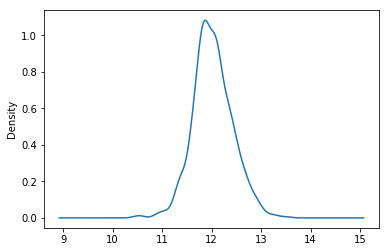

In [216]:
np.log(y).plot(kind="density")

In [108]:
housedata_test.head()  # testing the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [109]:
(housedata_test.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageCond         78
GarageQual         78
GarageYrBlt        78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
Exterior1st         1
                 ... 
OverallQual         0
SaleCondition       0
Heating             0
ExterQual           0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive

In [110]:
housedata_testnum=housedata_test.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
housedata_testcat=housedata_test.select_dtypes(include=[object])

In [111]:
housedata_testnum.shape  # numeric variable colulmns

(1459, 37)

In [112]:
housedata_testcat.shape  # categorical variable columns

(1459, 43)

In [113]:
housedata_testnum.head() #"MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold" these data values are not numeric hence deleting

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [114]:
housepricevaluestest=housedata_testnum[["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold","BsmtFullBath","BsmtFinSF1","BsmtFinSF2","GarageArea","GarageCars","BsmtUnfSF","TotalBsmtSF","BsmtHalfBath"]]

In [115]:
housedata_testnum=housedata_testnum.drop(["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold","BsmtFullBath","BsmtFinSF1","BsmtFinSF2","GarageArea","GarageCars","BsmtUnfSF","TotalBsmtSF","BsmtHalfBath"],axis=1)

In [116]:
housedata_testnum.head()

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1461,80.0,11622,0.0,896,0,0,896,1,0,...,1,5,0,140,0,0,0,120,0,0
1,1462,81.0,14267,108.0,1329,0,0,1329,1,1,...,1,6,0,393,36,0,0,0,0,12500
2,1463,74.0,13830,0.0,928,701,0,1629,2,1,...,1,6,1,212,34,0,0,0,0,0
3,1464,78.0,9978,20.0,926,678,0,1604,2,1,...,1,7,1,360,36,0,0,0,0,0
4,1465,43.0,5005,0.0,1280,0,0,1280,2,0,...,1,5,0,0,82,0,0,144,0,0


In [117]:
(housedata_testcat.isnull().sum()).sort_values(ascending=False) #these categorical values should be converted into none or no Pool so on..

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MasVnrType         16
MSZoning            4
Utilities           2
Functional          2
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition2          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
RoofStyle           0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
Electrical          0
CentralAir          0
SaleCondition       0
dtype: int64

In [118]:
nonecols1=["Alley","Fence","PoolQC","MiscFeature","FireplaceQu"] 

In [119]:
for col in nonecols1:
    housedata_testcat[col]=housedata_testcat[col].fillna(value="No")   #fillna function in pandas for data cleaning

C:\Users\Phani deep\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [120]:
housedata_testcat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,No,MnPrv,No,WD,Normal
1,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No,No,Gar2,WD,Normal
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,No,MnPrv,No,WD,Normal
3,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,No,No,No,WD,Normal
4,RL,Pave,No,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal


In [121]:
(housedata_testcat.isnull().sum()).sort_values(ascending=False)

GarageCond       78
GarageQual       78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType2     42
BsmtFinType1     42
MasVnrType       16
MSZoning          4
Functional        2
Utilities         2
SaleType          1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
FireplaceQu       0
PavedDrive        0
Street            0
Alley             0
LotShape          0
LandContour       0
Electrical        0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
CentralAir        0
HeatingQC         0
MiscFeature       0
ExterQual         0
ExterCond         0
Foundation        0
Heating           0
Fence             0
PoolQC            0
SaleCondition     0
dtype: int64

In [122]:
Garagecols1=["GarageType","GarageCond","GarageQual","GarageFinish"] #mod imputation

In [123]:
for cols in Garagecols1:
    Garagecol=pd.value_counts(housedata_testcat[cols])
    print(Garagecol)


Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64
TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64
Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64


In [124]:
Bsmtcols1=["BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"] # mod imputation

In [125]:
for cols in Bsmtcols1:
    Bsmtcol=pd.value_counts(housedata_testcat[cols])
    print(Bsmtcol)

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


In [126]:
for col in housedata_testcat:
    housedata_testcat[col].fillna(housedata_testcat[col].value_counts().idxmax(),inplace=True) #idxmax will impute the name of the column(for categorical value),max will impute column value(for numerical value)


C:\Users\Phani deep\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [127]:
for cols in Bsmtcols1:
    Bsmtcol=pd.value_counts(housedata_testcat[cols])
    print(Bsmtcol)         # increased in the number of unf

No    995
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64
Unf    1279
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64
TA    678
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64
TA    1340
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64
GLQ    473
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


In [128]:
(housedata_testcat.isnull().sum()).sort_values(ascending=False)

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

In [129]:
(housedata_testnum.isnull().sum()).sort_values(ascending=False)

LotFrontage      227
MasVnrArea        15
MiscVal            0
HalfBath           0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
PoolArea           0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
Id                 0
dtype: int64

In [130]:
housedata_testnum.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.5,2190.0,2554.5,2919.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.0,0.0,164.0,1290.0
1stFlrSF,1459.0,1156.534613,398.165820,407.0,873.5,1079.0,1382.5,5095.0
2ndFlrSF,1459.0,325.967786,420.610226,0.0,0.0,0.0,676.0,1862.0
LowQualFinSF,1459.0,3.543523,44.043251,0.0,0.0,0.0,0.0,1064.0
GrLivArea,1459.0,1486.045922,485.566099,407.0,1117.5,1432.0,1721.0,5095.0
FullBath,1459.0,1.570939,0.555190,0.0,1.0,2.0,2.0,4.0
HalfBath,1459.0,0.377656,0.503017,0.0,0.0,0.0,1.0,2.0


In [131]:
for col in housedata_testnum:
    housedata_testnum[col].fillna(housedata_testnum[col].mean(),inplace=True)


In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
le=LabelEncoder()

In [134]:
housedata_testcat1=housedata_testcat.apply(le.fit_transform)
housepricevaluestest1=housepricevaluestest.apply(le.fit_transform)

In [135]:
housepricedf1=pd.concat([housedata_testnum,housedata_testcat1,housepricevaluestest1],axis=1)

In [136]:
housepricedf1.head().transpose()

,0,1,2,3,4
Id,1461.0,1462.0,1463.0,1464.0,1465.0
LotFrontage,80.0,81.0,74.0,78.0,43.0
LotArea,11622.0,14267.0,13830.0,9978.0,5005.0
MasVnrArea,0.0,108.0,0.0,20.0,0.0
1stFlrSF,896.0,1329.0,928.0,926.0,1280.0
2ndFlrSF,0.0,0.0,701.0,678.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0
GrLivArea,896.0,1329.0,1629.0,1604.0,1280.0
FullBath,1.0,1.0,2.0,2.0,2.0
HalfBath,0.0,1.0,1.0,1.0,0.0


In [148]:
X=housepricedf1.drop(["Id"],axis=1)

In [149]:
neuralpredict=neural.predict(X)

In [150]:
pd.DataFrame(neuralpredict).to_csv("neural.csv") 

In [279]:
Randforpredict_test=Randfor.predict(X)

In [280]:
pd.DataFrame(Randforpredict_test).to_csv("Randforpredict1.csv") #converting to csv download from home of jupyter notebook then convert the values in csv to exp in csv using exp() the file will ne in local folder